# Practice notebook for pandas operations

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

## Setting defaults

In [2]:
DATA_PATH = './Data/'
PLOT_PATH = './plot/'
FILE_NAME = 'bmbf-answers.csv'
LEFT_SERVER_FILE = 'leftServerBmbfFiles.csv'
RIGHT_SERVER_FILE = 'rightServerBmbfFiles.csv'

In [3]:
# make folder for plots
os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)

## Reading questionnaire data

In [5]:
questionnaire_df = pd.read_csv(f'{DATA_PATH}{FILE_NAME}')

In [6]:
questionnaire_df.head()

,id,uid,date,Intention to Use 1,Perceived Usefulness 4,Perceived Ease of Use 2,Trust,Sex,Age,Aviophobia,Driving Frequency,Playing Hours,VR Playing Frequency
0,7,efb7844a4df8430f9d1c2f72babe5e86,2019-07-02 11:58:23,60,80,30,91,weiblich,51,1,32,0,unter 10
1,8,7be560561f2141518bd4f6c2c3c9f487,2019-07-02 12:07:53,56,62,36,85,männlich,52,0,34,0,Ein mal
2,9,fa0885937e114e9a907a5a4feda5798b,2019-07-02 12:09:22,29,79,27,52,männlich,49,0,30,0,Noch nie
3,10,132256b042674a5f8ed249578fc624b4,2019-07-02 12:45:58,100,96,100,83,männlich,47,0,30,8,Ein mal
4,11,3b057c2796314ef6a61de34c28d63e03,2019-07-02 12:51:29,68,78,37,50,männlich,52,0,32,0,Ein mal


### Basic formatting

In [7]:
questionnaire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       819 non-null    int64 
 1   uid                      819 non-null    object
 2   date                     819 non-null    object
 3   Intention to Use 1       819 non-null    int64 
 4   Perceived Usefulness 4   819 non-null    int64 
 5   Perceived Ease of Use 2  819 non-null    int64 
 6   Trust                    819 non-null    int64 
 7   Sex                      819 non-null    object
 8   Age                      819 non-null    int64 
 9   Aviophobia               819 non-null    int64 
 10  Driving Frequency        819 non-null    int64 
 11  Playing Hours            819 non-null    int64 
 12  VR Playing Frequency     819 non-null    object
dtypes: int64(9), object(4)
memory usage: 83.3+ KB


In [8]:
questionnaire_df.shape

(819, 13)

In [9]:
questionnaire_df.isna().sum()

id                         0
uid                        0
date                       0
Intention to Use 1         0
Perceived Usefulness 4     0
Perceived Ease of Use 2    0
Trust                      0
Sex                        0
Age                        0
Aviophobia                 0
Driving Frequency          0
Playing Hours              0
VR Playing Frequency       0
dtype: int64

In [11]:
questionnaire_df['date'] = (
    pd.to_datetime(questionnaire_df['date'], infer_datetime_format=True)
)

In [12]:
questionnaire_df.set_index('uid', inplace=True)

In [13]:
questionnaire_df.head()

,id,date,Intention to Use 1,Perceived Usefulness 4,Perceived Ease of Use 2,Trust,Sex,Age,Aviophobia,Driving Frequency,Playing Hours,VR Playing Frequency
uid,,,,,,,,,,,,
efb7844a4df8430f9d1c2f72babe5e86,7,2019-07-02 11:58:23,60,80,30,91,weiblich,51,1,32,0,unter 10
7be560561f2141518bd4f6c2c3c9f487,8,2019-07-02 12:07:53,56,62,36,85,männlich,52,0,34,0,Ein mal
fa0885937e114e9a907a5a4feda5798b,9,2019-07-02 12:09:22,29,79,27,52,männlich,49,0,30,0,Noch nie
132256b042674a5f8ed249578fc624b4,10,2019-07-02 12:45:58,100,96,100,83,männlich,47,0,30,8,Ein mal
3b057c2796314ef6a61de34c28d63e03,11,2019-07-02 12:51:29,68,78,37,50,männlich,52,0,32,0,Ein mal


In [15]:
questionnaire_df = questionnaire_df.drop(columns=['id', 'Aviophobia', 'Playing Hours'])

In [17]:
questionnaire_df.head()

,date,Intention to Use 1,Perceived Usefulness 4,Perceived Ease of Use 2,Trust,Sex,Age,Driving Frequency,VR Playing Frequency
uid,,,,,,,,,
efb7844a4df8430f9d1c2f72babe5e86,2019-07-02 11:58:23,60,80,30,91,weiblich,51,32,unter 10
7be560561f2141518bd4f6c2c3c9f487,2019-07-02 12:07:53,56,62,36,85,männlich,52,34,Ein mal
fa0885937e114e9a907a5a4feda5798b,2019-07-02 12:09:22,29,79,27,52,männlich,49,30,Noch nie
132256b042674a5f8ed249578fc624b4,2019-07-02 12:45:58,100,96,100,83,männlich,47,30,Ein mal
3b057c2796314ef6a61de34c28d63e03,2019-07-02 12:51:29,68,78,37,50,männlich,52,32,Ein mal


In [38]:
left_files = pd.read_csv(f'{DATA_PATH}{LEFT_SERVER_FILE}', header=None)
right_files = pd.read_csv(f'{DATA_PATH}{RIGHT_SERVER_FILE}', header=None)

In [39]:
filenames_df = pd.concat([left_files, right_files], ignore_index=True)

In [40]:
filenames_df.head()

,0
0,Path_ MS Wissenschaft-AVAS-00c831eddb5745e59cf...
1,Path_ MS Wissenschaft-AVAS-023a7f7f06484bada49...
2,Path_ MS Wissenschaft-AVAS-0247a28d6ddb4208bdc...
3,Path_ MS Wissenschaft-AVAS-04a271023f814ee9b27...
4,Path_ MS Wissenschaft-AVAS-0948a78440c149799ae...


In [41]:
filenames_df.rename(columns={0:'file_name'}, inplace=True)

In [42]:
filenames_df.head()

,file_name
0,Path_ MS Wissenschaft-AVAS-00c831eddb5745e59cf...
1,Path_ MS Wissenschaft-AVAS-023a7f7f06484bada49...
2,Path_ MS Wissenschaft-AVAS-0247a28d6ddb4208bdc...
3,Path_ MS Wissenschaft-AVAS-04a271023f814ee9b27...
4,Path_ MS Wissenschaft-AVAS-0948a78440c149799ae...


In [43]:
filenames_df = filenames_df['file_name'].str.split('-', expand=True)
filenames_df

,0,1,2
0,Path_ MS Wissenschaft,AVAS,00c831eddb5745e59cffba23918376c8.raw
1,Path_ MS Wissenschaft,AVAS,023a7f7f06484bada49f4d56dad4e090.raw
2,Path_ MS Wissenschaft,AVAS,0247a28d6ddb4208bdcca6c0adf25578.raw
3,Path_ MS Wissenschaft,AVAS,04a271023f814ee9b27bb1338186344c.raw
4,Path_ MS Wissenschaft,AVAS,0948a78440c149799aee01209da977c5.raw
...,...,...,...
1399,test (copy 5),None,None
1400,test (copy 6),None,None
1401,test (copy 7),None,None
1402,test (copy 8),None,None


In [44]:
filenames_df.rename(columns={1:'condition', 2:'uid'}, inplace=True)
filenames_df.head()

,0,condition,uid
0,Path_ MS Wissenschaft,AVAS,00c831eddb5745e59cffba23918376c8.raw
1,Path_ MS Wissenschaft,AVAS,023a7f7f06484bada49f4d56dad4e090.raw
2,Path_ MS Wissenschaft,AVAS,0247a28d6ddb4208bdcca6c0adf25578.raw
3,Path_ MS Wissenschaft,AVAS,04a271023f814ee9b27bb1338186344c.raw
4,Path_ MS Wissenschaft,AVAS,0948a78440c149799aee01209da977c5.raw


In [45]:
filenames_df['uid'] = filenames_df['uid'].str.replace('.raw', '')
filenames_df.head()

/var/folders/g8/ypnc8p1504z5jmrpjc4jzyw80000gn/T/ipykernel_99651/1843251559.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  filenames_df['uid'] = filenames_df['uid'].str.replace('.raw', '')


,0,condition,uid
0,Path_ MS Wissenschaft,AVAS,00c831eddb5745e59cffba23918376c8
1,Path_ MS Wissenschaft,AVAS,023a7f7f06484bada49f4d56dad4e090
2,Path_ MS Wissenschaft,AVAS,0247a28d6ddb4208bdcca6c0adf25578
3,Path_ MS Wissenschaft,AVAS,04a271023f814ee9b27bb1338186344c
4,Path_ MS Wissenschaft,AVAS,0948a78440c149799aee01209da977c5


In [46]:
filenames_df.drop(columns=[0], inplace=True)

In [47]:
filenames_df.head()

,condition,uid
0,AVAS,00c831eddb5745e59cffba23918376c8
1,AVAS,023a7f7f06484bada49f4d56dad4e090
2,AVAS,0247a28d6ddb4208bdcca6c0adf25578
3,AVAS,04a271023f814ee9b27bb1338186344c
4,AVAS,0948a78440c149799aee01209da977c5


In [48]:
filenames_df.isna().sum()

condition    20
uid          20
dtype: int64

In [49]:
filenames_df = filenames_df.dropna(subset=['uid', 'condition'])
filenames_df.head()

,condition,uid
0,AVAS,00c831eddb5745e59cffba23918376c8
1,AVAS,023a7f7f06484bada49f4d56dad4e090
2,AVAS,0247a28d6ddb4208bdcca6c0adf25578
3,AVAS,04a271023f814ee9b27bb1338186344c
4,AVAS,0948a78440c149799aee01209da977c5


In [50]:
filenames_df.set_index('uid', inplace=True)

In [51]:
filenames_df.head()

,condition
uid,
00c831eddb5745e59cffba23918376c8,AVAS
023a7f7f06484bada49f4d56dad4e090,AVAS
0247a28d6ddb4208bdcca6c0adf25578,AVAS
04a271023f814ee9b27bb1338186344c,AVAS
0948a78440c149799aee01209da977c5,AVAS


In [34]:
questionnaire_df.head()

,date,Intention to Use 1,Perceived Usefulness 4,Perceived Ease of Use 2,Trust,Sex,Age,Driving Frequency,VR Playing Frequency
uid,,,,,,,,,
efb7844a4df8430f9d1c2f72babe5e86,2019-07-02 11:58:23,60,80,30,91,weiblich,51,32,unter 10
7be560561f2141518bd4f6c2c3c9f487,2019-07-02 12:07:53,56,62,36,85,männlich,52,34,Ein mal
fa0885937e114e9a907a5a4feda5798b,2019-07-02 12:09:22,29,79,27,52,männlich,49,30,Noch nie
132256b042674a5f8ed249578fc624b4,2019-07-02 12:45:58,100,96,100,83,männlich,47,30,Ein mal
3b057c2796314ef6a61de34c28d63e03,2019-07-02 12:51:29,68,78,37,50,männlich,52,32,Ein mal


In [52]:
conditions_df = questionnaire_df.merge(filenames_df, on='uid')
conditions_df.head()

,date,Intention to Use 1,Perceived Usefulness 4,Perceived Ease of Use 2,Trust,Sex,Age,Driving Frequency,VR Playing Frequency,condition
uid,,,,,,,,,,
efb7844a4df8430f9d1c2f72babe5e86,2019-07-02 11:58:23,60,80,30,91,weiblich,51,32,unter 10,RadioTalk
7be560561f2141518bd4f6c2c3c9f487,2019-07-02 12:07:53,56,62,36,85,männlich,52,34,Ein mal,AVAS
fa0885937e114e9a907a5a4feda5798b,2019-07-02 12:09:22,29,79,27,52,männlich,49,30,Noch nie,TaxiDriver
132256b042674a5f8ed249578fc624b4,2019-07-02 12:45:58,100,96,100,83,männlich,47,30,Ein mal,TaxiDriver
3b057c2796314ef6a61de34c28d63e03,2019-07-02 12:51:29,68,78,37,50,männlich,52,32,Ein mal,RadioTalk


In [53]:
conditions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818 entries, efb7844a4df8430f9d1c2f72babe5e86 to 2065be8ac47247318e6cc0a52aa6380f
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     818 non-null    datetime64[ns]
 1   Intention to Use 1       818 non-null    int64         
 2   Perceived Usefulness 4   818 non-null    int64         
 3   Perceived Ease of Use 2  818 non-null    int64         
 4   Trust                    818 non-null    int64         
 5   Sex                      818 non-null    object        
 6   Age                      818 non-null    int64         
 7   Driving Frequency        818 non-null    int64         
 8   VR Playing Frequency     818 non-null    object        
 9   condition                818 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 70.3+ KB


In [54]:
conditions_df.Sex.value_counts()

männlich        440
weiblich        313
keine Angabe     35
intersex         30
Name: Sex, dtype: int64

In [55]:
conditions_df.Sex = conditions_df.Sex.map({
    'weiblich':'female',
    'männlich':'male',
    'intersex':'intersex',
    'keine Angabe': 'na'
})

conditions_df.Sex.value_counts()

male        440
female      313
na           35
intersex     30
Name: Sex, dtype: int64

In [56]:
conditions_df['VR Playing Frequency'].value_counts()

Noch nie           301
unter 10           260
Ein mal            180
mehr als 10 mal     77
Name: VR Playing Frequency, dtype: int64

In [57]:
conditions_df['VR Playing Frequency'] = conditions_df['VR Playing Frequency'].map({
    'Noch nie':'never',
    'unter 10':'under 10',
    'Ein mal':'once',
    'mehr als 10 mal':'more than 10'
})
conditions_df['VR Playing Frequency'].value_counts()

never           301
under 10        260
once            180
more than 10     77
Name: VR Playing Frequency, dtype: int64

In [58]:
conditions_df.columns

Index(['date', 'Intention to Use 1', 'Perceived Usefulness 4',
       'Perceived Ease of Use 2', 'Trust', 'Sex', 'Age', 'Driving Frequency',
       'VR Playing Frequency', 'condition'],
      dtype='object')

In [59]:
conditions_df = conditions_df.rename(columns={
    'Intention to Use 1':'Intention',
    'Perceived Usefulness 4':'Usefulness',
    'Perceived Ease of Use 2':'Ease',
    'Trust':'Trust'
})

conditions_df.head()

,date,Intention,Usefulness,Ease,Trust,Sex,Age,Driving Frequency,VR Playing Frequency,condition
uid,,,,,,,,,,
efb7844a4df8430f9d1c2f72babe5e86,2019-07-02 11:58:23,60,80,30,91,female,51,32,under 10,RadioTalk
7be560561f2141518bd4f6c2c3c9f487,2019-07-02 12:07:53,56,62,36,85,male,52,34,once,AVAS
fa0885937e114e9a907a5a4feda5798b,2019-07-02 12:09:22,29,79,27,52,male,49,30,never,TaxiDriver
132256b042674a5f8ed249578fc624b4,2019-07-02 12:45:58,100,96,100,83,male,47,30,once,TaxiDriver
3b057c2796314ef6a61de34c28d63e03,2019-07-02 12:51:29,68,78,37,50,male,52,32,once,RadioTalk


In [60]:
conditions_df = conditions_df.rename(columns={
    'Driving Frequency':'driving',
    'VR Playing Frequency':'VR',
})
conditions_df.head()

,date,Intention,Usefulness,Ease,Trust,Sex,Age,driving,VR,condition
uid,,,,,,,,,,
efb7844a4df8430f9d1c2f72babe5e86,2019-07-02 11:58:23,60,80,30,91,female,51,32,under 10,RadioTalk
7be560561f2141518bd4f6c2c3c9f487,2019-07-02 12:07:53,56,62,36,85,male,52,34,once,AVAS
fa0885937e114e9a907a5a4feda5798b,2019-07-02 12:09:22,29,79,27,52,male,49,30,never,TaxiDriver
132256b042674a5f8ed249578fc624b4,2019-07-02 12:45:58,100,96,100,83,male,47,30,once,TaxiDriver
3b057c2796314ef6a61de34c28d63e03,2019-07-02 12:51:29,68,78,37,50,male,52,32,once,RadioTalk


## Data Exploration

<AxesSubplot:ylabel='Frequency'>

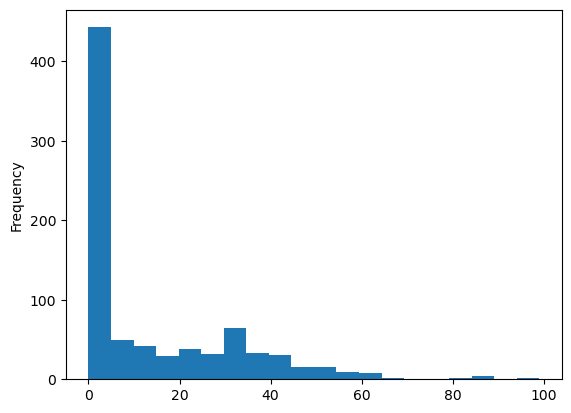

In [61]:
conditions_df.driving.plot(kind='hist', bins=20)

In [62]:
conditions_df.driving.describe()

count    818.000000
mean      13.130807
std       17.708057
min        0.000000
25%        0.000000
50%        2.000000
75%       25.000000
max       99.000000
Name: driving, dtype: float64

In [63]:
conditions_df['is_regular_driver'] = False

conditions_df.loc[conditions_df.driving >=5, 'is_regular_driver'] = True

In [64]:
conditions_df.is_regular_driver.value_counts()

False    443
True     375
Name: is_regular_driver, dtype: int64

In [66]:
conditions_df.condition.value_counts(normalize=True)

AVAS          0.354523
RadioTalk     0.326406
TaxiDriver    0.319071
Name: condition, dtype: float64

In [67]:
conditions_df.groupby('Sex').Trust.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,313.0,69.191693,28.192931,0.0,50.00,75.0,99.00,100.0
intersex,30.0,52.933333,32.222217,0.0,29.75,50.0,77.75,100.0
male,440.0,75.422727,26.139863,0.0,50.00,84.0,100.00,100.0
na,35.0,63.771429,30.010866,0.0,50.00,55.0,100.00,100.0


In [68]:
conditions_df.groupby(['Sex', 'condition']).Trust.describe()

count       mean        std   min    25%   50%     75%  \
Sex      condition                                                            
female   AVAS        101.0  68.297030  26.112658   5.0  50.00  73.0   91.00   
         RadioTalk   121.0  70.247934  28.891833   0.0  50.00  78.0  100.00   
         TaxiDriver   91.0  68.780220  29.702900   0.0  50.00  75.0  100.00   
intersex AVAS         12.0  53.250000  37.914078   0.0  27.00  45.0   88.75   
         RadioTalk     6.0  54.166667  20.701852  17.0  50.75  58.0   63.75   
         TaxiDriver   12.0  52.000000  33.212812   0.0  32.25  50.0   74.50   
male     AVAS        168.0  74.970238  25.831890   0.0  50.00  83.5  100.00   
         RadioTalk   127.0  76.740157  25.832247   0.0  50.00  86.0  100.00   
         TaxiDriver  145.0  74.793103  26.891732   0.0  50.00  83.0  100.00   
na       AVAS          9.0  70.666667  26.329641  28.0  50.00  83.0   89.00   
         RadioTalk    13.0  48.538462  30.737099   0.0  38.00  50.0   55.00   
         TaxiDriver   13.0  74.230769  27.191156  28.0  50.00  76.0  100.00   

                       max  
Sex      condition          
female   AVAS        100.0  
         RadioTalk   100.0  
         TaxiDriver  100.0  
intersex AVAS        100.0  
         RadioTalk    78.0  
         TaxiDriver  100.0  
male     AVAS        100.0  
         RadioTalk   100.0  
         TaxiDriver  100.0  
na       AVAS        100.0  
         RadioTalk   100.0  
         TaxiDriver  100.0

In [69]:
conditions_df.head() #wide form table

,date,Intention,Usefulness,Ease,Trust,Sex,Age,driving,VR,condition,is_regular_driver
uid,,,,,,,,,,,
efb7844a4df8430f9d1c2f72babe5e86,2019-07-02 11:58:23,60,80,30,91,female,51,32,under 10,RadioTalk,True
7be560561f2141518bd4f6c2c3c9f487,2019-07-02 12:07:53,56,62,36,85,male,52,34,once,AVAS,True
fa0885937e114e9a907a5a4feda5798b,2019-07-02 12:09:22,29,79,27,52,male,49,30,never,TaxiDriver,True
132256b042674a5f8ed249578fc624b4,2019-07-02 12:45:58,100,96,100,83,male,47,30,once,TaxiDriver,True
3b057c2796314ef6a61de34c28d63e03,2019-07-02 12:51:29,68,78,37,50,male,52,32,once,RadioTalk,True


In [70]:
conditions_df.shape

(818, 11)

In [72]:
conditions_long_df = pd.melt(
    conditions_df.reset_index(),
    id_vars=['uid', 'condition', 'Age', 'Sex', 'is_regular_driver', 'VR', 'driving'],
    value_vars=['Intention', 'Usefulness', 'Ease', 'Trust'],
    var_name='TAM',
    value_name='score'
)
conditions_long_df

,uid,condition,Age,Sex,is_regular_driver,VR,driving,TAM,score
0,efb7844a4df8430f9d1c2f72babe5e86,RadioTalk,51,female,True,under 10,32,Intention,60
1,7be560561f2141518bd4f6c2c3c9f487,AVAS,52,male,True,once,34,Intention,56
2,fa0885937e114e9a907a5a4feda5798b,TaxiDriver,49,male,True,never,30,Intention,29
3,132256b042674a5f8ed249578fc624b4,TaxiDriver,47,male,True,once,30,Intention,100
4,3b057c2796314ef6a61de34c28d63e03,RadioTalk,52,male,True,once,32,Intention,68
...,...,...,...,...,...,...,...,...,...
3267,ed32759c3cf1423bab04a9879a0a5b18,RadioTalk,57,female,True,under 10,39,Trust,75
3268,eadcb5eadeef46689d852bc2327c5706,TaxiDriver,66,male,True,never,48,Trust,81
3269,9ac84825faeb48d484192ebd10759d74,TaxiDriver,59,female,True,never,41,Trust,51
3270,ca40e5d5fce94763b84a352ce4739778,TaxiDriver,67,male,True,under 10,48,Trust,27


In [75]:
conditions_long_df.groupby(['Sex', 'TAM']).score.describe()

count       mean        std  min   25%   50%    75%    max
Sex    TAM                                                                   
female Ease        313.0  62.335463  28.498638  0.0  50.0  61.0   88.0  100.0
       Intention   313.0  59.910543  29.559886  0.0  50.0  56.0   83.0  100.0
       Trust       313.0  69.191693  28.192931  0.0  50.0  75.0   99.0  100.0
       Usefulness  313.0  62.051118  28.211835  0.0  50.0  60.0   86.0  100.0
male   Ease        440.0  72.840909  26.191291  0.0  50.0  77.0  100.0  100.0
       Intention   440.0  70.729545  29.220738  0.0  50.0  77.0  100.0  100.0
       Trust       440.0  75.422727  26.139863  0.0  50.0  84.0  100.0  100.0
       Usefulness  440.0  72.622727  27.329399  0.0  50.0  77.0  100.0  100.0

In [74]:
conditions_long_df = conditions_long_df.query('Sex in ["male", "female"]')

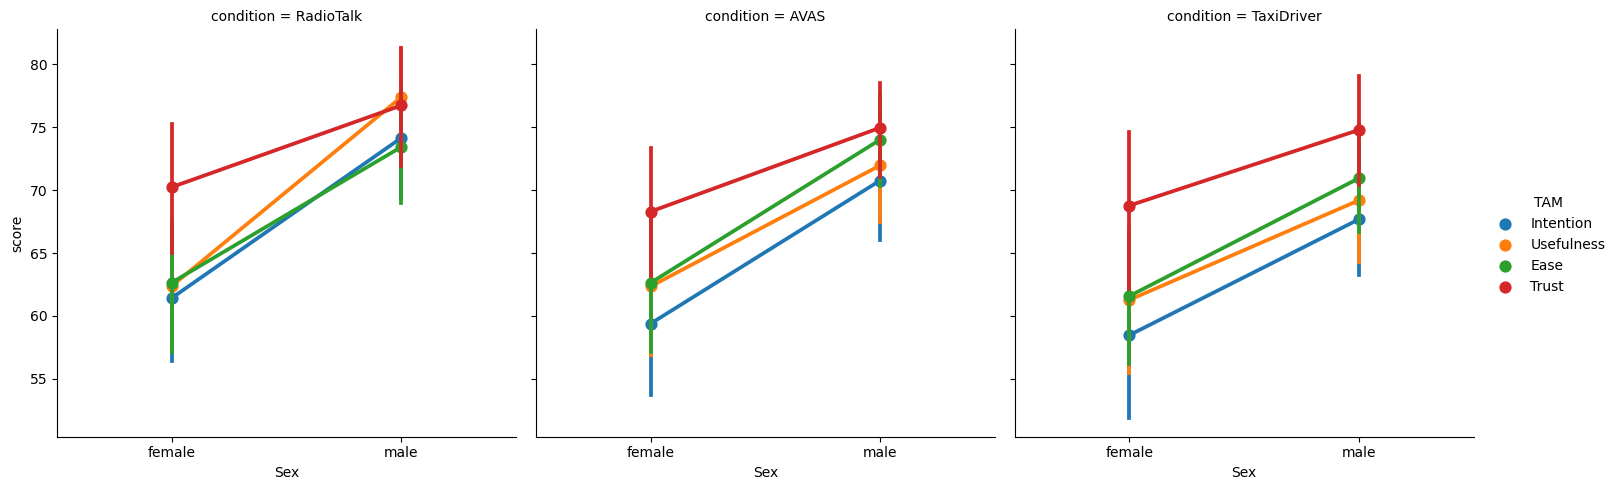

In [79]:
sns.catplot(
    data=conditions_long_df,
    y='score',
    x='Sex',
    hue='TAM',
    col='condition',
    kind='point'
);

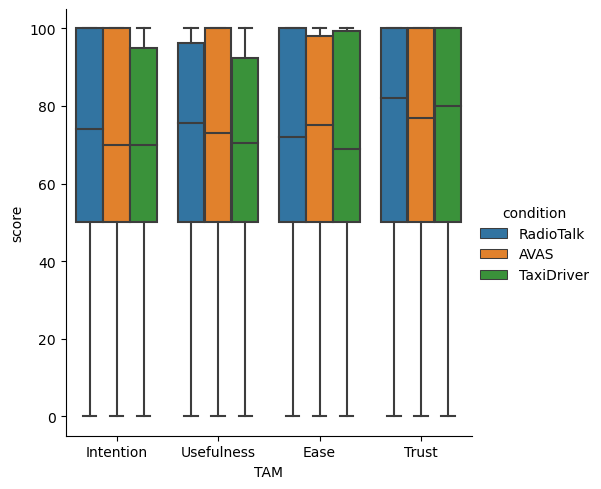

In [82]:
sns.catplot(
    data=conditions_long_df,
    y='score',
    x='TAM',
    hue='condition',
    kind='box'
);

<AxesSubplot:ylabel='Frequency'>

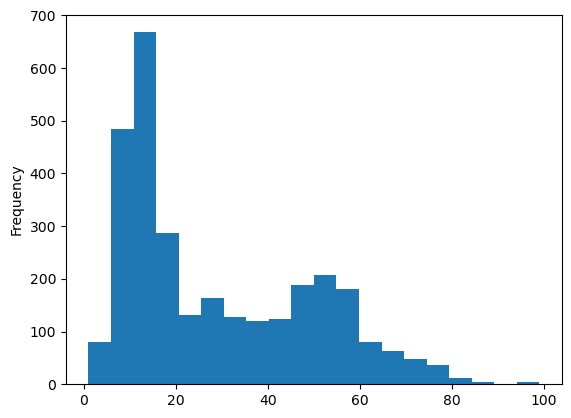

In [83]:
conditions_long_df.Age.plot(kind='hist', bins=20)

In [84]:
conditions_long_df['binned_age'] = pd.cut(
    conditions_long_df.Age, 
    bins=[0,20, 40, 60, 80, 100],
    labels=['<20', '21-40', '41-60', '60-80', '>80']
)

conditions_long_df.head()

/var/folders/g8/ypnc8p1504z5jmrpjc4jzyw80000gn/T/ipykernel_99651/3668821723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conditions_long_df['binned_age'] = pd.cut(


,uid,condition,Age,Sex,is_regular_driver,VR,driving,TAM,score,binned_age
0,efb7844a4df8430f9d1c2f72babe5e86,RadioTalk,51,female,True,under 10,32,Intention,60,41-60
1,7be560561f2141518bd4f6c2c3c9f487,AVAS,52,male,True,once,34,Intention,56,41-60
2,fa0885937e114e9a907a5a4feda5798b,TaxiDriver,49,male,True,never,30,Intention,29,41-60
3,132256b042674a5f8ed249578fc624b4,TaxiDriver,47,male,True,once,30,Intention,100,41-60
4,3b057c2796314ef6a61de34c28d63e03,RadioTalk,52,male,True,once,32,Intention,68,41-60


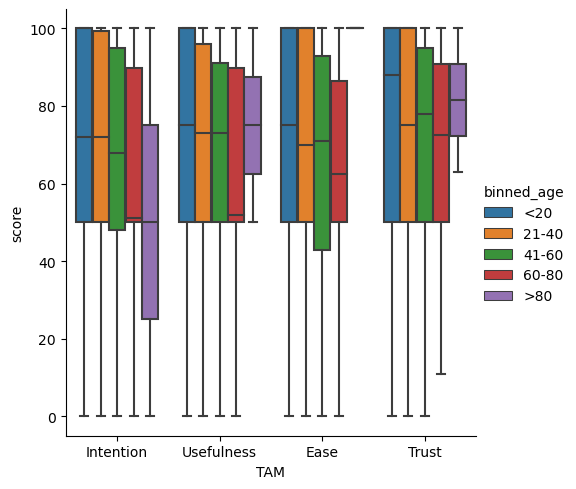

In [86]:
sns.catplot(
    data=conditions_long_df,
    x='TAM',
    y='score',
    hue='binned_age',
    kind='box'
);

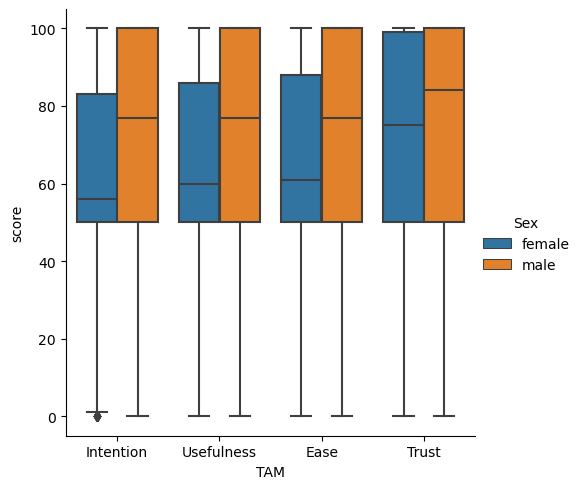

In [87]:
sns.catplot(
    data=conditions_long_df,
    x='TAM',
    y='score',
    hue='Sex',
    kind='box'
);

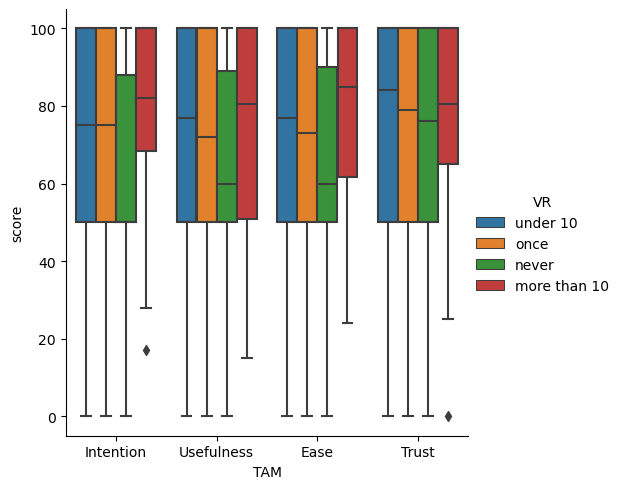

In [88]:
sns.catplot(
    data=conditions_long_df,
    x='TAM',
    y='score',
    hue='VR',
    kind='box'
);

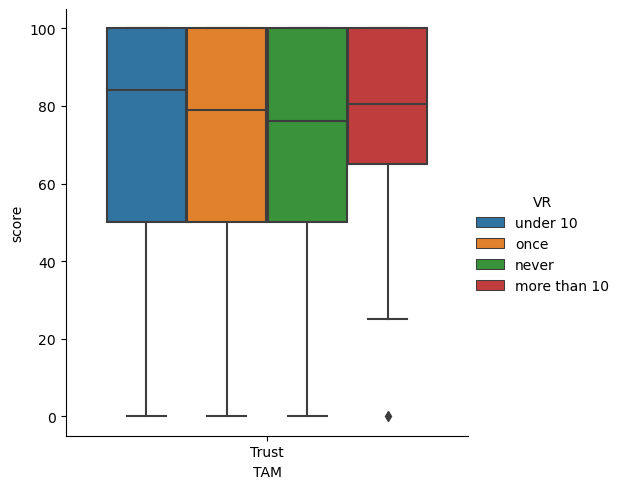

In [90]:
tmpdf = conditions_long_df.query('TAM == "Trust"')

sns.catplot(
    data=tmpdf,
    x='TAM',
    y='score',
    hue='VR',
    kind='box'
);

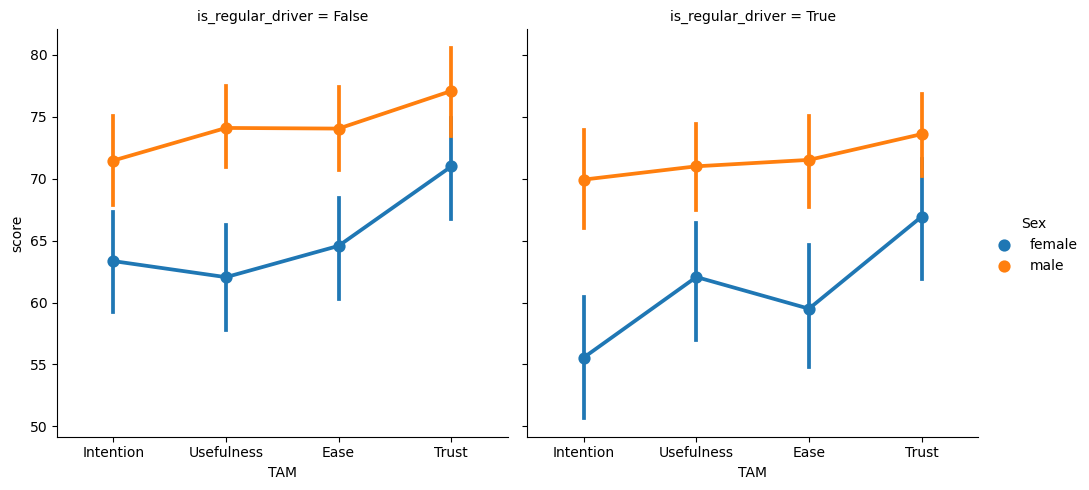

In [91]:
sns.catplot(
    data=conditions_long_df,
    x='TAM',
    y='score',
    hue='Sex',
    col='is_regular_driver',
    kind='point'
);

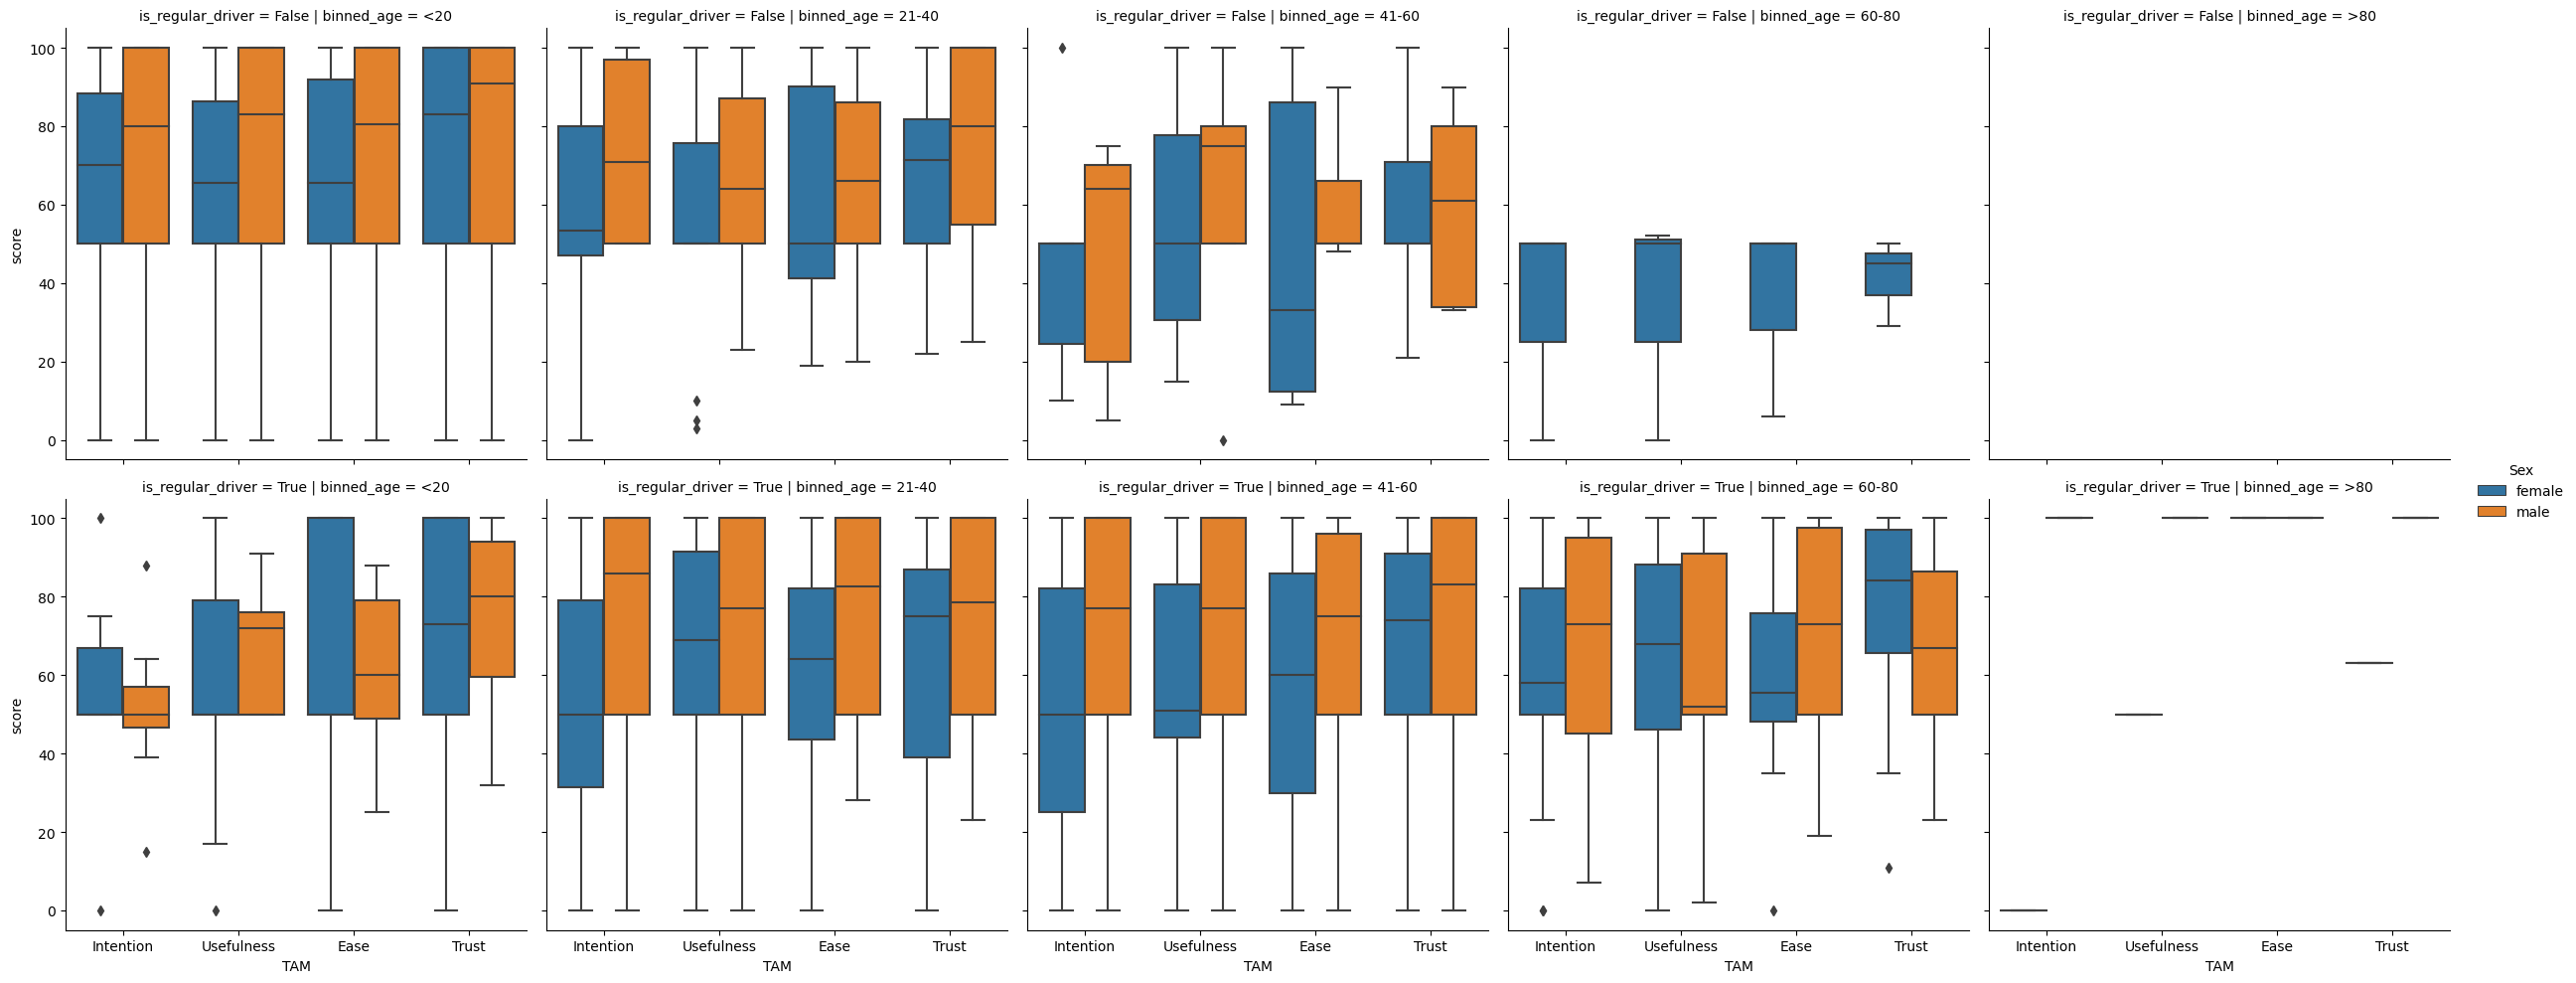

In [95]:
sns.catplot(
    data=conditions_long_df,
    x='TAM',
    y='score',
    hue='Sex',
    row='is_regular_driver',
    col='binned_age',
    kind='box',
    dodge=True,
);